<a href="https://colab.research.google.com/github/arsenmikovic/ArsensLibcamera/blob/main/3F8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

In [ ]:
permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

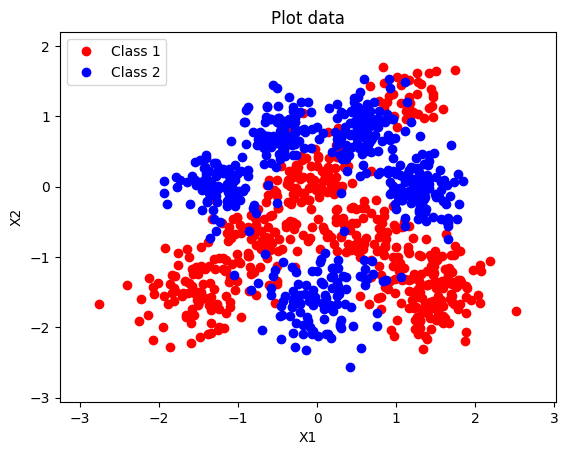

In [ ]:
import matplotlib.pyplot as plt

##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

plot_data(X, y)

In [ ]:
#Question two
n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))

In [ ]:

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))


def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))



def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)


In [ ]:
def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)

        w = w + alpha * np.matmul(X_tilde_train.T, (y_train - sigmoid_value))
        # XXX Gradient-based update rule for w. To be completed by the student

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        #print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test


alpha = 0.001
# XXX Learning rate for gradient-based optimisation. To be completed by the student
n_steps = 100
# XXX Number of steps of gradient-based optimisation. To be completed by the student

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

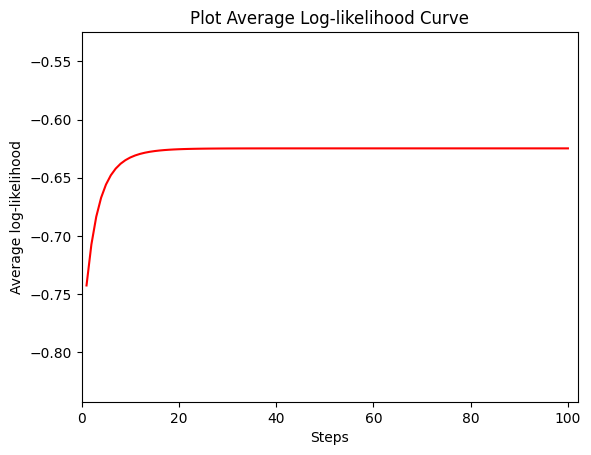

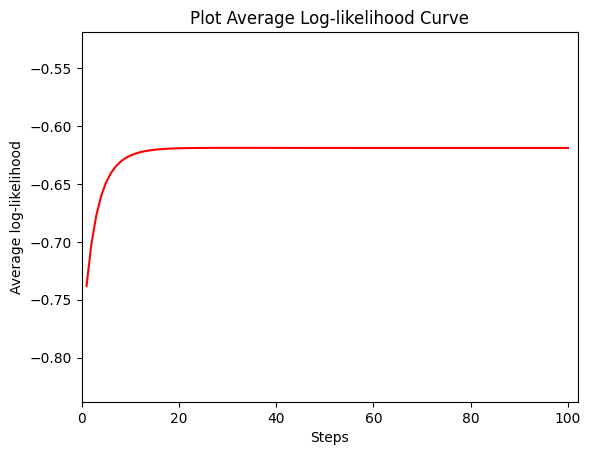

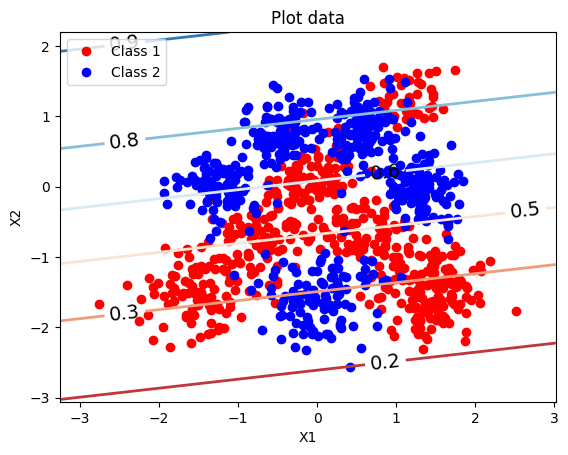

In [ ]:
def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()

# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)


def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

# We plot the predictive distribution

plot_predictive_distribution(X, y, w)

In [ ]:
#Question three
def CF(X_tilde_test, w):
    predictions = predict(X_tilde_test, w)
    y_tilda = [1 if predictions[i] > 0.5 else 0 for i in range(len(predictions))]

    y0 = [x for x, m in zip(y_tilda, y_test) if m == 0]
    y1 = [x for x, m in zip(y_tilda, y_test) if m == 1]


    CF = np.array([[(len(y0) - sum(y0))/ len(y0), sum(y0)/ len(y0)], [(len(y1) - sum(y1))/ len(y1), sum(y1)/ len(y1)]])
    print(CF)

In [ ]:
#Question four

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)




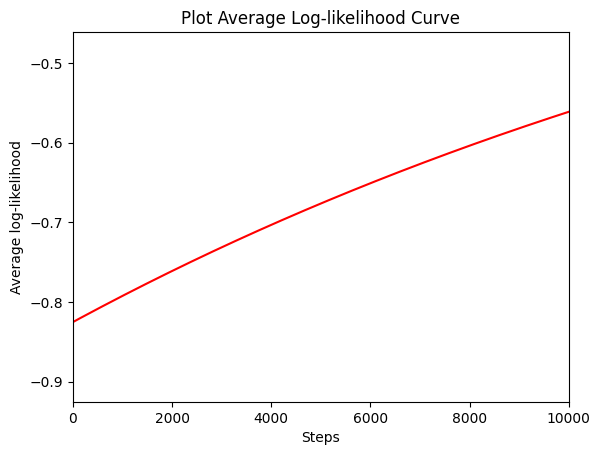

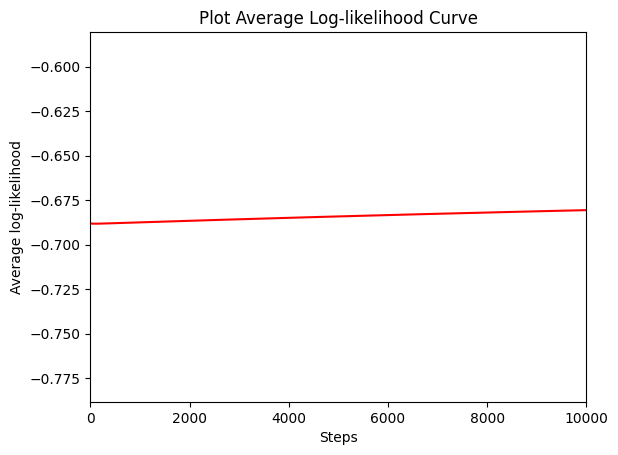

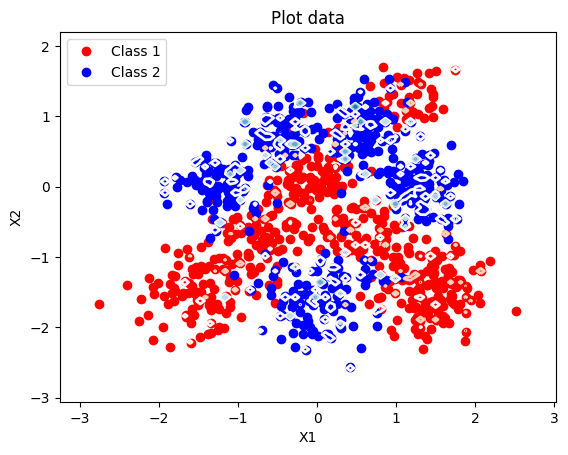

[[0.97115385 0.02884615]
 [0.82291667 0.17708333]]


In [ ]:
l = 0.01
# XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.0001
# XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student
n_steps = 10000
# XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))

CF(X_tilde_test, w)

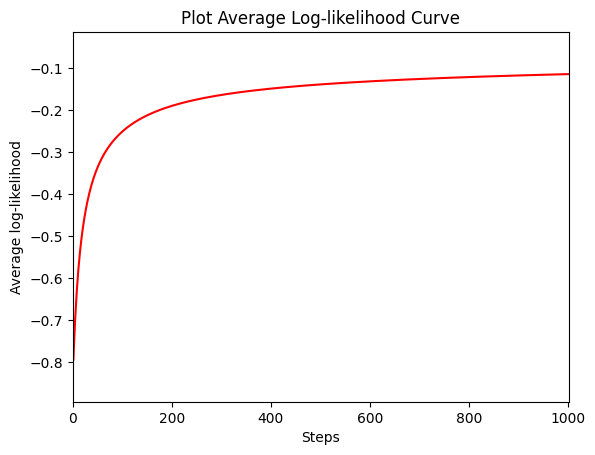

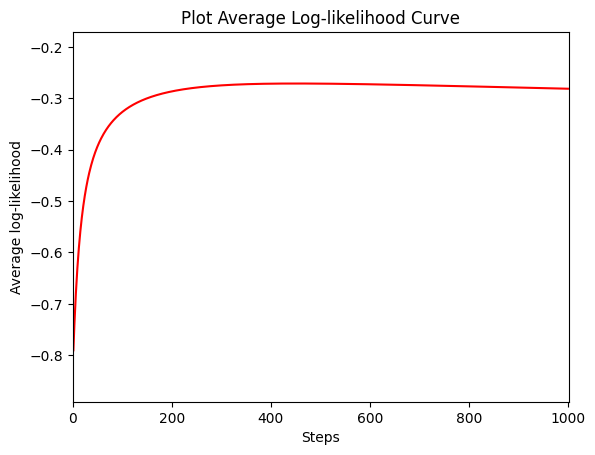

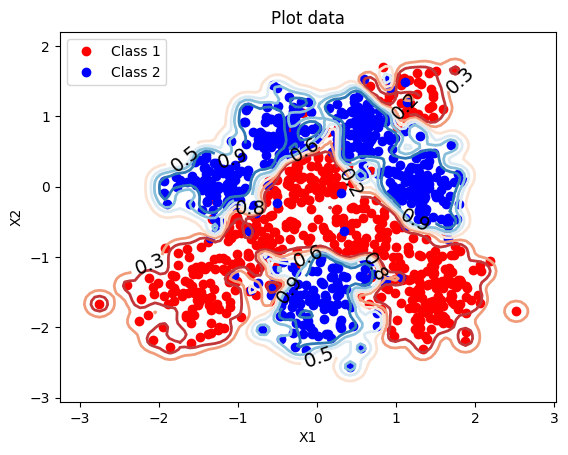

[[0.94230769 0.05769231]
 [0.10416667 0.89583333]]


In [ ]:
l = 0.1
# XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.005
# XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student
n_steps = 1000
# XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))
CF(X_tilde_test, w)

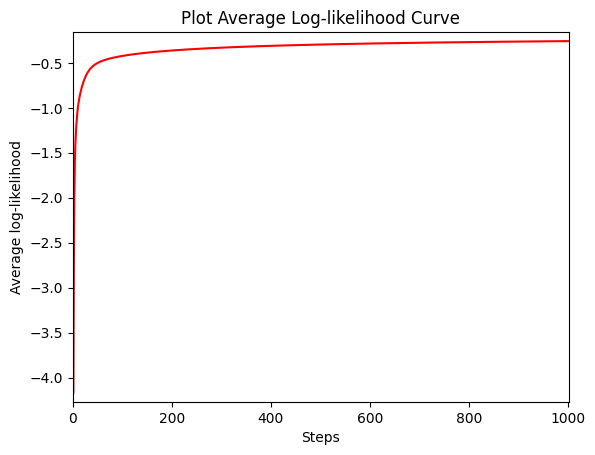

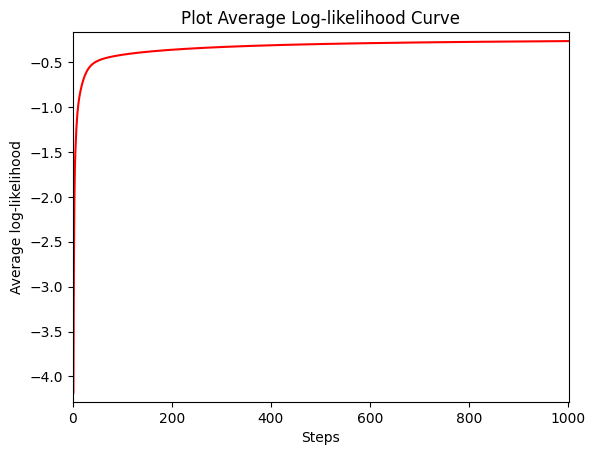

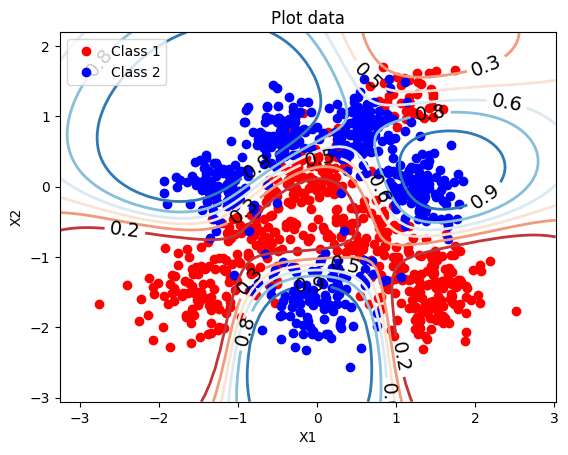

[[0.90384615 0.09615385]
 [0.09375    0.90625   ]]


In [ ]:
l = 1
# XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

# We train the new classifier on the feature expanded inputs

alpha = 0.0001
# XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student
n_steps = 1000
# XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))
CF(X_tilde_test, w)